Name: Samin Thapa

University ID: 2408644

Dataset Source: Weather Forecast
The dataset was created by Zeeshan Ahmad in the year 2024.
The dataset can be accessed through the following Kaggle link: https://www.kaggle.com/datasets/zeeshier/weather-forecast-dataset

This dataset aligns with two UNSDGs, Goal 13: Climate Action and Goal 11: Sustainable Cities and Communities.
The classification model supports these Goals by:
- Predicting extreme weather events.
- Developing strategies to mitigate their impacts.
- Preparing for disasters.
- Ensuring the safety and resilience of communities.

Key features:
- Temperature
- Humidity
- Wind speed
- Cloud cover
- Pressure
- Rain

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Concept and Technologies of AI/Coursework/weather_forecast_data.csv')

# Display the first few rows
print(df.head())


   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [ ]:
#Handle Missing Values:
# Define the imputer for numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Define the imputer for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Apply the imputers
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [ ]:
# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include=['object']))


       Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean     22.581725    64.347094     9.906255    49.658104  1014.312336
std       7.326996    19.954739     5.780316    29.123104    20.196433
min      10.001842    30.005071     0.009819     0.015038   980.014486
25%      16.359398    47.339815     4.761909    23.900016   996.938630
50%      22.536448    63.920797     9.908572    49.488284  1013.433035
75%      28.976476    81.561021    14.948408    75.324140  1031.735067
max      34.995214    99.997481    19.999132    99.997795  1049.985593
           Rain
count      2500
unique        2
top     no rain
freq       2186


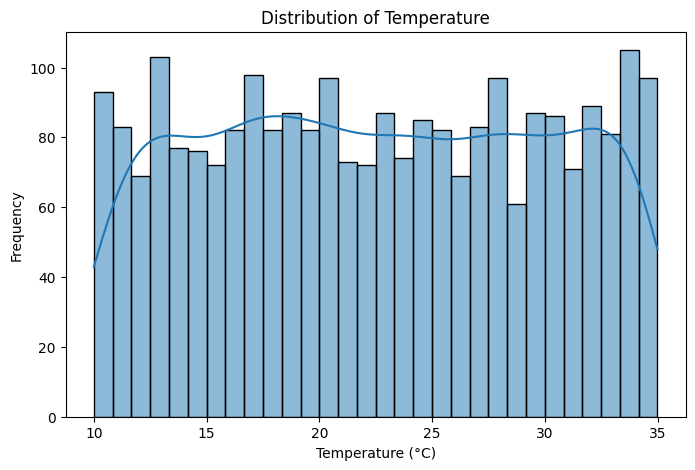

In [ ]:
# Visualization: Temperature Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Temperature'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


- The histogram reveals the spread of temperatures in the dataset.
- A normal distribution suggests balanced temperature variations, while skewness indicates extreme temperatures.
- If the distribution has multiple peaks, different climate patterns may exist in the dataset.



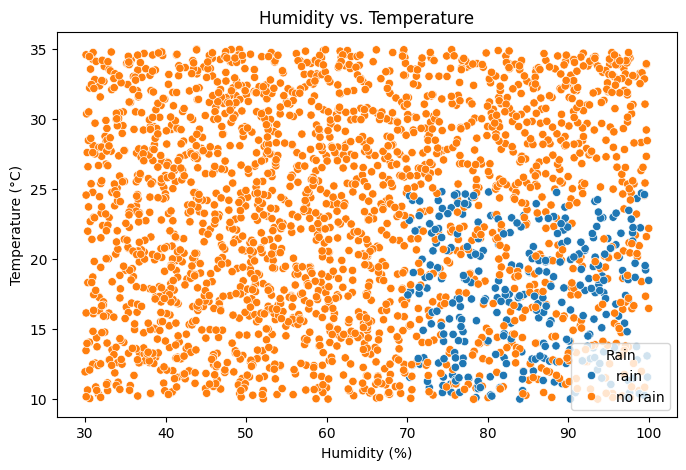

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Humidity'], y=df['Temperature'], hue=df['Rain'])
plt.title('Humidity vs. Temperature')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.show()


- The scatter plot helps identify the relationship between humidity and temperature.
- If points with higher humidity and lower temperature correspond to Rain = 1, this suggests that rain is more likely under these conditions.
- If there's no clear trend, it means humidity and temperature alone may not strongly predict rain.


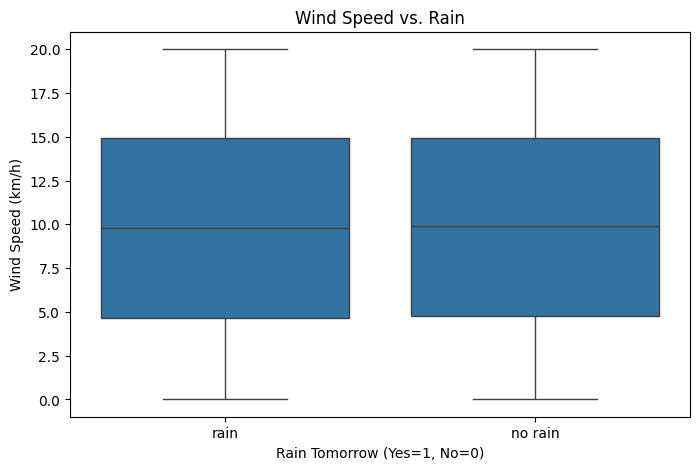

In [ ]:
# Visualization: Wind Speed Distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Rain'], y=df['Wind_Speed'])
plt.title('Wind Speed vs. Rain')
plt.xlabel('Rain Tomorrow (Yes=1, No=0)')
plt.ylabel('Wind Speed (km/h)')
plt.show()


- The box plot compares wind speed distribution on rainy vs. non-rainy days.
- If the median wind speed is higher on rainy days, it suggests that strong winds are linked to rainfall.
- A wide range of wind speeds on rainy days indicates variability, possibly due to storms

In [ ]:
df['Rain']=df['Rain'].map({'rain':1,'no rain':0})

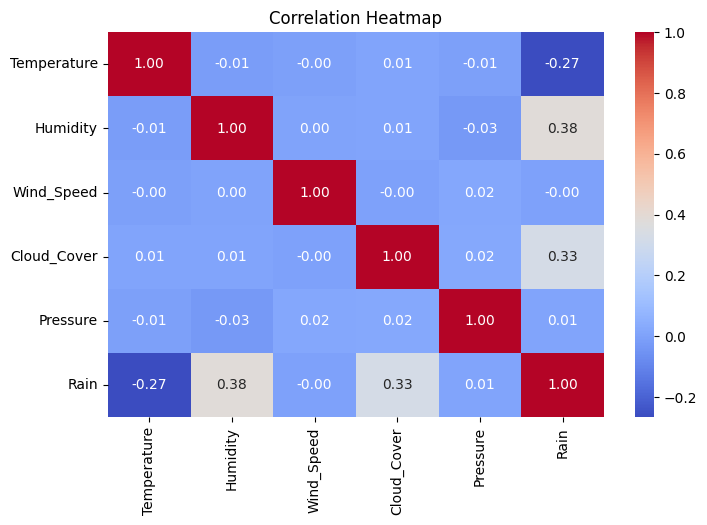

In [ ]:
# Visualization: Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


- A strong negative correlation between temperature and humidity suggests that cooler days are more humid.
- If rain is positively correlated with humidity and cloud cover, these variables may be useful for predicting rainfall.
- Weak correlations indicate that certain variables alone may not be strong predictors of rain, requiring additional weather factors.

## Logistic Regression from scratch.

In [ ]:

def logistic_function(x):
  import numpy as np
  y = 1/(1 + np.exp(-x))
  return y
def log_loss(y_true, y_pred):
  import numpy as np
  # Ensure y_pred is clipped to avoid log(0)
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
  loss = -(y_true * np.log(y_pred)) - ((1-y_true) * np.log(1- y_pred))
  return loss

# Cost function - using vectorization
def cost_function(y_true, y_pred):
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)
    loss_vec = np.array([log_loss(y_true[i], y_pred[i]) for i in range(n)])
    cost = np.dot(loss_vec, np.ones(n)) / n
    return cost

y_true, y_pred = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])
print(f"cost_function({y_true}, {y_pred}) = {cost_function(y_true, y_pred)}")

# Function to compute cost function in terms of model parameters - using vectorization
def costfunction_logreg(X, y, w, b):
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    # Compute z using np.dot
    z = np.dot(X, w) + b  # Matrix-vector multiplication and adding bias

    # Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(z)

    # Compute the cost using the cost function
    cost = cost_function(y, y_pred)

    return cost
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")

def compute_gradient(X, y, w, b):
    n, d = X.shape  # X has shape (n, d)
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(np.dot(X, w) + b)  # Compute z = X * w + b

    # Compute gradients
    grad_w = np.dot(X.T, (y_pred - y)) / n  # Gradient w.r.t weights, shape (d,)
    grad_b = np.dot(np.ones(n), (y_pred - y)) / n  # Gradient w.r.t bias, scalar

    return grad_w, grad_b

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


# Test the gradient_descent function with sample data
X = np.array([[0.1, 0.2], [-0.1, 0.1]])  # Shape (2, 2)
y = np.array([1, 0])                     # Shape (2,)
w = np.zeros(X.shape[1])                 # Shape (2,) - same as number of features
b = 0.0                                  # Scalar
alpha = 0.01                              # Learning rate
n_iter = 1000                           # Number of iterations

# Perform gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=True, show_params=False)

# Print final parameters and cost
print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")

import numpy as np

def prediction(X, w, b, threshold=0.5):
    # Compute the predicted probabilities using the logistic function
    y_test_prob = logistic_function(np.dot(X, w) + b)

    # Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred

# Evaluation Function: Computes confusion matrix, precision, recall, and F1-score
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    # Precision, recall, and F1-score with safe handling of zero division
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Ensure metrics are floats
    precision = float(precision)
    recall = float(recall)
    f1_score = float(f1_score)

    # Return metrics as a dictionary
    return confusion_matrix, precision, recall, f1_score



cost_function([0 1 0], [0.4  0.6  0.25]) = 0.43644443999458743
cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350834906
Iteration 0: Cost = 0.693116
Iteration 100: Cost = 0.690004
Iteration 200: Cost = 0.686915
Iteration 300: Cost = 0.683849
Iteration 400: Cost = 0.680803
Iteration 500: Cost = 0.677776
Iteration 600: Cost = 0.674769
Iteration 700: Cost = 0.671781
Iteration 800: Cost = 0.668812
Iteration 900: Cost = 0.665861
Iteration 999: Cost = 0.662958

Final parameters:
w: [0.49229414 0.2426748 ], b: -0.023148495722947558
Final cost: 0.662958


In [ ]:
# Train-test split
X = df.drop(columns=['Rain']).values
y = df['Rain'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 10000

# Train model
print("\nTraining Logistic Regression Model:")
w, b, cost_history,params_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False)


Training Logistic Regression Model:
Iteration 0: Cost = 0.675795
Iteration 100: Cost = 0.269120
Iteration 200: Cost = 0.219963
Iteration 300: Cost = 0.199286
Iteration 400: Cost = 0.187582
Iteration 500: Cost = 0.179989
Iteration 600: Cost = 0.174655
Iteration 700: Cost = 0.170706
Iteration 800: Cost = 0.167672
Iteration 900: Cost = 0.165275
Iteration 1000: Cost = 0.163339
Iteration 1100: Cost = 0.161750
Iteration 1200: Cost = 0.160426
Iteration 1300: Cost = 0.159310
Iteration 1400: Cost = 0.158360
Iteration 1500: Cost = 0.157544
Iteration 1600: Cost = 0.156839
Iteration 1700: Cost = 0.156226
Iteration 1800: Cost = 0.155689
Iteration 1900: Cost = 0.155216
Iteration 2000: Cost = 0.154799
Iteration 2100: Cost = 0.154428
Iteration 2200: Cost = 0.154098
Iteration 2300: Cost = 0.153803
Iteration 2400: Cost = 0.153539
Iteration 2500: Cost = 0.153302
Iteration 2600: Cost = 0.153088
Iteration 2700: Cost = 0.152895
Iteration 2800: Cost = 0.152720
Iteration 2900: Cost = 0.152562
Iteration 3000:

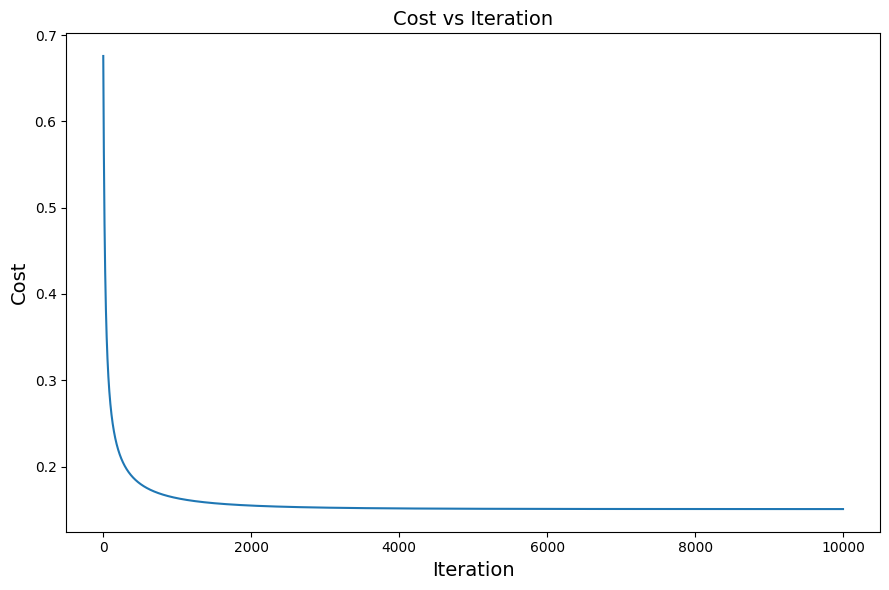

In [ ]:
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)

 # Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.1508
Test Loss (Cost): 0.1587


In [ ]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Test Accuracy: 92.20%

Confusion Matrix:
[[418  19]
 [ 20  43]]
Precision: 0.69
Recall: 0.68
F1-Score: 0.69


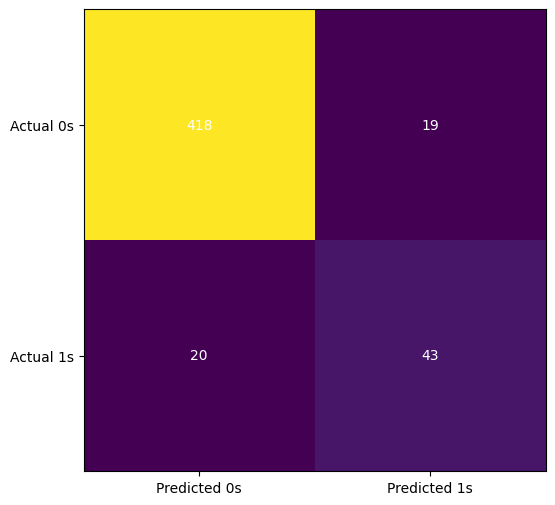

In [ ]:
# Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')
plt.show()

## 3.Logistic Regression from Scikit Learn


Confusion Matrix:
 [[430  13]
 [ 21  36]]
Precision: 0.7347
Recall: 0.6316
F1-score: 0.6792
Accuracy: 0.9320


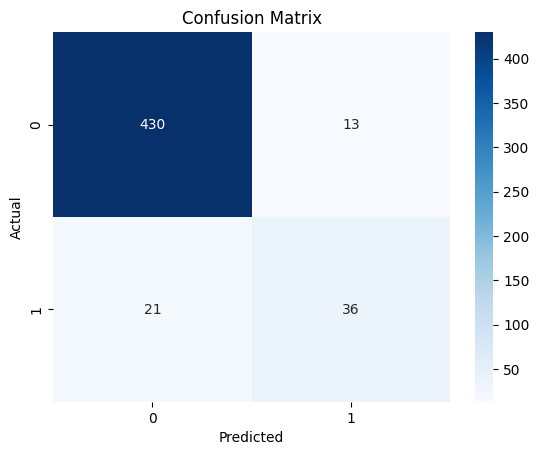

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score #Import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) #Calculate accuracy

# Print results
print("Confusion Matrix:\n", confusion)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}") #Print accuracy

# Visualization
# Generate confusion matrix using the imported function
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Classifier Using Scikit Learn

Confusion Matrix:
 [[443   0]
 [  1  56]]
Precision: 1.0000
Recall: 0.9825
F1-score: 0.9912
Accuracy: 0.9980


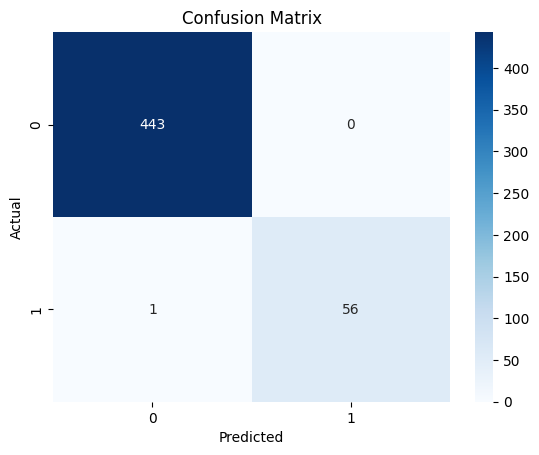

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(random_state=42) # Use RandomForestClassifier
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Confusion Matrix:\n", confusion)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Visualization
# Generate confusion matrix using the imported function
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Conclusion for both models
The Random Forest model outperformed Logistic Regression in predicting rainfall based on weather conditions. It achieved a significantly higher accuracy (99.8% vs. 93.2%), meaning it made fewer overall errors. Additionally, its precision (100% vs. 73.5%) indicates that it correctly identified rainy days without false positives, while its recall (98.3% vs. 63.2%) shows that it detected actual rainy days more effectively. The F1-score (99.1% vs. 67.9%) further highlights its balanced performance in handling both false positives and false negatives. Given these metrics, Random Forest is the better model as it captures complex relationships in the weather data more effectively, leading to more reliable predictions.

## 4.Hyper-parameter Optimization with Cross-Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# HYPERPARAMETER TUNING WITH GRIDSEARCH

# 1. Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42),
                              param_grid_lr,
                              cv=3,
                              scoring='accuracy',
                              verbose=0)
grid_search_lr.fit(X_train_scaled, y_train)
print("Best Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)
best_lr_model = grid_search_lr.best_estimator_

# 2. Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_rf,
                              cv=3,
                              scoring='accuracy',
                              verbose=0)
grid_search_rf.fit(X_train_scaled, y_train)
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

# MODEL EVALUATION WITH BEST HYPERPARAMETERS
y_pred_lr = best_lr_model.predict(X_test_scaled)
print("\nLogistic Regression Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

y_pred_rf = best_rf_model.predict(X_test_scaled)
print("\nRandom Forest Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Best Hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Logistic Regression Performance:
Confusion Matrix:
 [[430  13]
 [ 23  34]]
Precision: 0.7234
Recall: 0.5965
F1-score: 0.6538
Accuracy: 0.9280

Random Forest Performance:
Confusion Matrix:
 [[443   0]
 [  1  56]]
Precision: 1.0000
Recall: 0.9825
F1-score: 0.9912
Accuracy: 0.9980


- Logistic Regression performs reasonably well with a l1 penalty and liblinear solver, but its performance is outpaced by Random Forest, which achieves near-perfect precision, recall, and F1-score.

- Random Forest with its best hyperparameters (n_estimators = 200) has a clear advantage, providing significantly better classification results in terms of both accuracy and precision.

## 5.Feature Selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/Concept and Technologies of AI/Coursework/weather_forecast_data.csv')
df['Rain'] = df['Rain'].map({'rain': 1, 'no rain': 0})
X = df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']]
y = df['Rain']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. SelectFromModel with Logistic Regression (L1 Regularization)
#    L1 regularization (Lasso) can drive coefficients of unimportant features to zero.
#    SelectFromModel selects features whose coefficients are non-zero.

# Train a Logistic Regression model with L1 penalty
logistic = LogisticRegression(penalty="l1", solver='liblinear', random_state=42)
logistic.fit(X_train_scaled, y_train)

# Select features based on non-zero coefficients
sfm = SelectFromModel(logistic, prefit=True) # 'prefit=True' assumes the model is already fitted
X_train_selected_lr = sfm.transform(X_train_scaled)
X_test_selected_lr = sfm.transform(X_test_scaled)

# Print the selected features
selected_features_lr = X.columns[sfm.get_support()] #Get names of selected features
print("Selected Features (Logistic Regression with L1):", selected_features_lr)

# 2. SelectFromModel with RandomForestClassifier (Feature Importance)
#    RandomForestClassifier provides feature importances based on how much each feature
#    contributes to reducing impurity (e.g., Gini impurity or entropy).

# Train a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42) # Example parameters
rf.fit(X_train_scaled, y_train)

# Select features based on feature importance
sfm_rf = SelectFromModel(rf, threshold="mean", prefit=True) # Select features with importance above the mean
X_train_selected_rf = sfm_rf.transform(X_train_scaled)
X_test_selected_rf = sfm_rf.transform(X_test_scaled)

# Print the selected features
selected_features_rf = X.columns[sfm_rf.get_support()] #Get names of selected features
print("Selected Features (Random Forest):", selected_features_rf)

# 1. Logistic Regression with Selected Features

# Train a Logistic Regression model using only the selected features
model_lr_selected = LogisticRegression(random_state=42)
model_lr_selected.fit(X_train_selected_lr, y_train)

# Make predictions on the test set
y_pred_lr_selected = model_lr_selected.predict(X_test_selected_lr)

# Evaluate the model
print("\nLogistic Regression Performance with Selected Features:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_selected))
print(f"Precision: {precision_score(y_test, y_pred_lr_selected):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr_selected):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr_selected):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_selected):.4f}")

# 2. Random Forest with Selected Features

# Train a Random Forest model using only the selected features
model_rf_selected = RandomForestClassifier(random_state=42)
model_rf_selected.fit(X_train_selected_rf, y_train)

# Make predictions on the test set
y_pred_rf_selected = model_rf_selected.predict(X_test_selected_rf)

# Evaluate the model
print("\nRandom Forest Performance with Selected Features:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_selected))
print(f"Precision: {precision_score(y_test, y_pred_rf_selected):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_selected):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf_selected):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_selected):.4f}")


Selected Features (Logistic Regression with L1): Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure'], dtype='object')
Selected Features (Random Forest): Index(['Temperature', 'Humidity', 'Cloud_Cover'], dtype='object')

Logistic Regression Performance with Selected Features:
Confusion Matrix:
 [[430  13]
 [ 21  36]]
Precision: 0.7347
Recall: 0.6316
F1-score: 0.6792
Accuracy: 0.9320

Random Forest Performance with Selected Features:
Confusion Matrix:
 [[443   0]
 [  1  56]]
Precision: 1.0000
Recall: 0.9825
F1-score: 0.9912
Accuracy: 0.9980


## 6.Final Model

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_selected_lr = X_train_scaled
X_test_selected_lr = X_test_scaled
X_train_selected_rf = X_train_scaled
X_test_selected_rf = X_test_scaled

# Best hyperparameters from GridSearch
best_params_lr = {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
best_params_rf = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# 1. Logistic Regression

# Create and train the final Logistic Regression model with hyperparameters
final_lr_model = LogisticRegression(**best_params_lr, random_state=42)
final_lr_model.fit(X_train_selected_lr, y_train)

# Make predictions
y_pred_lr = final_lr_model.predict(X_test_selected_lr)

# Evaluate the model
print("\nFinal Logistic Regression Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

# 2. Random Forest

# Create and train the final Random Forest model with hyperparameters
final_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
final_rf_model.fit(X_train_selected_rf, y_train)

# Make predictions
y_pred_rf = final_rf_model.predict(X_test_selected_rf)

# Evaluate the model
print("\nFinal Random Forest Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")



Final Logistic Regression Performance:
Confusion Matrix:
 [[429  14]
 [ 20  37]]
Precision: 0.7255
Recall: 0.6491
F1-score: 0.6852
Accuracy: 0.9320

Final Random Forest Performance:
Confusion Matrix:
 [[443   0]
 [  1  56]]
Precision: 1.0000
Recall: 0.9825
F1-score: 0.9912
Accuracy: 0.9980


## 7.Conclusion

1. Model Performance:
- Random Forest performed best with 99.8% accuracy, 100% precision, and 98.3% recall, making it the most reliable model.
- Scikit-Learn’s Logistic Regression (93.2% accuracy) outperformed the custom Logistic Regression (92.8% accuracy).
- Both logistic regression models had lower recall and F1-scores, making them less effective at predicting rainy days.

2. Impact of Methods:
- Feature selection ensured a focused and relevant model.
- Gradient descent helped the custom Logistic Regression reduce cost, but it still underperformed.
- Random Forest’s ensemble approach handled complex data better, leading to superior accuracy.

3. Insights and Future Directions:
- Ensemble methods like Random Forest are more effective for weather prediction.
- Hyperparameter tuning and feature engineering could further enhance accuracy.
- Cross-validation and testing advanced models (e.g., Gradient Boosting, neural networks) could improve results.